In [130]:
#Importing the necessary python packages and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
#Connecting to the data for analysis-Data pre-processing 
glucose = pd.read_csv('cgm_date.csv')
steps = pd.read_csv('steps_date.csv')
sleep = pd.read_csv('beddit_date.csv')
gps = pd.read_csv('loc_date.csv')

# File naming explanation:

'glucose' is the file that contains the data about the user glucose measurements from the sensor

'steps' conatins the data from the activity monitor of the patient

'sleep' contains the data from the device 'beddit' which tracks information about the users sleep timings

'gps' contains users location data and the amount of time spent in a particular location.

In [92]:
# Exploratory data analysis

In [93]:
# Checking the null values in the datasets

In [133]:
sleep.isnull().sum()

Unnamed: 0            0
start_date            0
start_time            0
end_date              0
end_time              0
sleep_duration        0
wake_duration         0
away_duration         0
resting_heart_rate    0
avr_resp_rate         0
dtype: int64

In [134]:
gps.isnull().sum()

enddate             0
endtime             0
startdate           0
starttime           0
time_spent\nH:MM    0
type                0
dtype: int64

In [96]:
# Removing the null values -migrating null values in the feature Historic_ Glucose with values from scan_Glucose

In [135]:
glucose.loc[glucose['Historic_ Glucose'].isnull(), 'Historic_ Glucose'] = glucose['Scan_Glucose']

In [137]:
#retaining the non null instances
glucose = glucose[glucose['Historic_ Glucose'].notnull()]

In [100]:
# Feature Assessment

#Assessing the various features of the dataset 

In [138]:
glucose.columns

Index(['cgmdate', 'cgmtime', 'Historic_ Glucose', 'Scan_Glucose'], dtype='object')

In [139]:
steps.columns

Index(['stepsdate', 'stepstime', 'active_time', 'distance', 'id', 'steps'], dtype='object')

In [140]:
sleep.columns

Index(['Unnamed: 0', 'start_date', 'start_time', 'end_date', 'end_time',
       'sleep_duration', 'wake_duration', 'away_duration',
       'resting_heart_rate', 'avr_resp_rate'],
      dtype='object')

In [141]:
gps.columns

Index(['enddate', 'endtime', 'startdate', 'starttime', 'time_spent\nH:MM',
       'type'],
      dtype='object')

#sampling data from all the data sets

In [142]:
glucose.sample(5)

,cgmdate,cgmtime,Historic_ Glucose,Scan_Glucose
6466,120220170000,10019001604,165.0,NaN
3605,110420170000,10019001839,75.0,NaN
1333,101420170000,10019000302,118.0,NaN
838,100920170000,10019001156,181.0,NaN
6101,112920170000,10019000402,70.0,NaN


In [106]:
steps.sample(5)

,stepsdate,stepstime,active_time,distance,id,steps
15,110120170000,10019002207,4516,6466,2248,8340
12,101720170000,10019002018,2491,3373,2233,4445
21,101320170000,10019002159,2982,4132,2229,5360
14,110220170000,10019002150,1464,3866,2249,3442
29,100520170000,10019001859,552,793,2193,1017


In [107]:
sleep.sample(2)

,Unnamed: 0,start_date,start_time,end_date,end_time,sleep_duration,wake_duration,away_duration,resting_heart_rate,avr_resp_rate
29,29,100520170000,10019002110,100620170000,10019000453,26167,960,0,63.06152,13.99122
23,23,101120170000,10019002020,101220170000,10019000435,29346,360,0,59.98535,13.59815


In [108]:
gps.sample(2)

,enddate,endtime,startdate,starttime,time_spent H:MM,type
157,101320170000,10019001501,101320170000,10019001442,0:18,place unique
63,100920170000,10019001059,100920170000,10019000812,2:47,place 2


Pre cleaning visual assessment of the glucose dataset

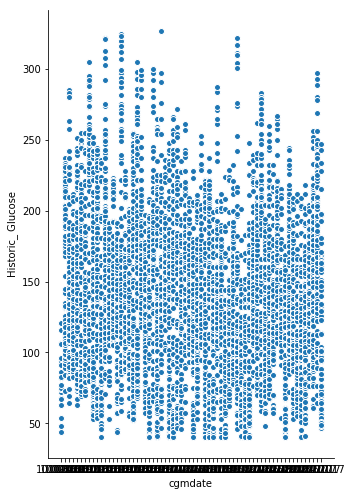

In [167]:
sns.pairplot(glucose, x_vars = ['cgmdate']  , y_vars = 'Historic_ Glucose',size = 7, aspect =0.7)

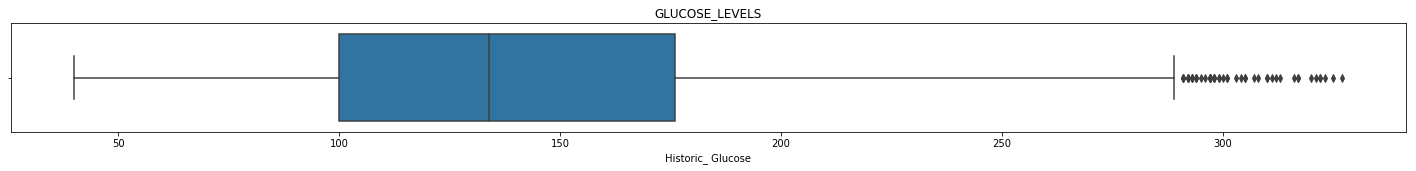

In [169]:
#To check the outlier values in the dataset
plt.figure(figsize=(25, 2))
plt.title("GLUCOSE_LEVELS")
sns.boxplot(glucose['Historic_ Glucose'])

In [109]:
# Cleaning the data 

Selecting the necessary features from the datasets.
Features selected in glucose:
    1. cgmdate
    2. Historic_ Glucose
    


In [143]:
glucose = glucose.loc[:,['cgmdate','Historic_ Glucose']]

Features selected in sleep:
    1. end_date
    2. sleep_duration
    3. wake_duration
    4. resting_heart_rate
    5. avr_resp_rate

In [144]:
sleep = sleep.loc [:,['end_date','sleep_duration','wake_duration','resting_heart_rate','avr_resp_rate']]

Features selected in steps:
    1. stepsdate
    2. active_time
    3. distance
    4. steps

In [145]:
steps = steps.loc[:,['stepsdate','active_time','steps','distance']]

Selecting the necessary features from the datasets.
features selected in location:
    1. enddate
    2. time_spent H:MM
    3. type
   

In [146]:
gps = gps.loc[:,['enddate','time_spent\nH:MM','type']]

Apart from the datetime data points in the feature contained additional '0000'. 
lambda x fucntion used to remove the additional '0000' in the instacnces in the feature.

In [147]:
glucose['cgmdate'] = glucose['cgmdate'].map(lambda x: str(x)[:-4])

In [148]:
sleep['end_date'] = sleep['end_date'].map(lambda x: str(x)[:-4])

In [149]:
steps['stepsdate'] = steps['stepsdate'].map(lambda x:str(x)[:-4])

In [150]:
gps['enddate'] = gps['enddate'].map(lambda x :str(x)[:-4])

In [151]:
#changing the feature name for easier naming
gps.columns = gps.columns.str.replace ("time_spent\nH:MM", "time_spent")

Merging all the datasets by the common feature, i.e, the date on which the data is collected.
'merge' function was used with an 'inner' joint to combine all the datsets. 

In [152]:
glucose_sleep= sleep.merge(glucose, how = 'inner', left_on = 'end_date', right_on = 'cgmdate')

In [153]:
glucose_sleep.sample(2)

,end_date,sleep_duration,wake_duration,resting_heart_rate,avr_resp_rate,cgmdate,Historic_ Glucose
2721,10102017,26717,0,61.779790,13.973510,10102017,139.0
1590,10272017,27632,360,67.675781,14.206287,10272017,127.0


In [154]:
glucose_sleep_steps = glucose_sleep.merge(steps, how = 'inner', left_on = 'cgmdate', right_on = 'stepsdate')

In [155]:
glucose_sleep_steps.sample(2)

,end_date,sleep_duration,wake_duration,resting_heart_rate,avr_resp_rate,cgmdate,Historic_ Glucose,stepsdate,active_time,steps,distance
11,10182017,25898,360,0.00000,13.499142,10182017,93.0,10182017,8423,17511,16813
1593,10132017,27304,1200,58.95996,13.829230,10132017,150.0,10132017,2982,5360,4132


In [156]:
glucose_sleep_steps_gps = glucose_sleep_steps.merge(gps, how = 'inner', left_on = 'cgmdate', right_on = 'enddate')

In [157]:
glucose_sleep_steps_gps.sample(2)

,end_date,sleep_duration,wake_duration,resting_heart_rate,avr_resp_rate,cgmdate,Historic_ Glucose,stepsdate,active_time,steps,distance,enddate,time_spent,type
8369,10152017,32056,480,61.52344,14.37770,10152017,127.0,10152017,4582,8135,6161,10152017,0:09,place unique
12906,10092017,24217,0,65.62500,14.06047,10092017,71.0,10092017,5650,10724,8451,10092017,16:33,place 1


In [158]:
g_sleep_steps_gps.isnull().sum()

end_date                  0
sleep_duration            0
wake_duration             0
resting_heart_rate        0
avr_resp_rate             0
cgmdate                   0
Historic_ Glucose         0
stepsdate                 0
active_time               0
steps                     0
distance                  0
enddate                   0
time_spent            15346
type                      0
dtype: int64

In [ ]:
g_sleep_steps_gps.shape

In [ ]:
g_sleep_steps_gps.columns

In [160]:
df = g_sleep_steps_gps.loc[:,['cgmdate','steps', 'sleep_duration','time_spent','type','Historic_ Glucose' ]]

In [ ]:
# Writing the dataframe to a new .csv file

In [165]:
df.to_csv('final_df')

# creating viz with seaborn

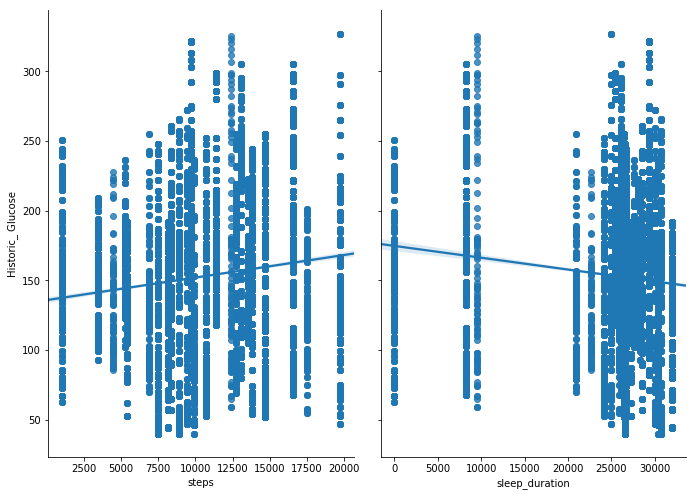

In [164]:
sns.pairplot(df, x_vars = ['steps', 'sleep_duration']  , y_vars = 'Historic_ Glucose',size = 7, aspect =0.7, kind = 'reg')